## **1. Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor


In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# **2. Gathering and Observing Data**

In [4]:
# Load the dataset to the project with the help of read_csv() and observe the first 5 columns
data = pd.read_csv("Melbourne_housing_FULL.csv")
df_copy = data.copy()
df_copy.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.500,3067.000,...,1.000,1.000,126.000,NaN,NaN,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.000
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,...,1.000,1.000,202.000,NaN,NaN,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,...,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.500,3067.000,...,2.000,1.000,0.000,NaN,NaN,Yarra City Council,-37.811,145.012,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,...,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000


In [5]:
# Find the shape, number of columns and size of the dataset
print(f"Shape: {df_copy.shape}")
print(f"Size: {df_copy.size}")
print(f"Number of Columns: {len(df_copy.columns)}")

Shape: (34857, 21)
Size: 731997
Number of Columns: 21


Show the information of the dataset, which contains the number of columns, column
labels, column data types, memory usage, range index, and the number of cells in
each column (non-null values).


In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

As we can see we have a lot of null values in columns like Bedroom2, Bathroom, Car etc.

In [7]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

## **2. EDA**

Examine the descriptive statistics of dataset

In [8]:
# Examine the descriptive statistics of dataset
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.000,3.031,0.970,1.000,2.000,3.000,4.000,16.000
Price,27247.000,1050173.345,641467.130,85000.000,635000.000,870000.000,1295000.000,11200000.000
Distance,34856.000,11.185,6.789,0.000,6.400,10.300,14.000,48.100
Postcode,34856.000,3116.063,109.024,3000.000,3051.000,3103.000,3156.000,3978.000
Bedroom2,26640.000,3.085,0.981,0.000,2.000,3.000,4.000,30.000
Bathroom,26631.000,1.625,0.724,0.000,1.000,2.000,2.000,12.000
Car,26129.000,1.729,1.011,0.000,1.000,2.000,2.000,26.000
Landsize,23047.000,593.599,3398.842,0.000,224.000,521.000,670.000,433014.000
BuildingArea,13742.000,160.256,401.267,0.000,102.000,136.000,188.000,44515.000
YearBuilt,15551.000,1965.290,37.328,1196.000,1940.000,1970.000,2000.000,2106.000


### **2.1 Object Columns To Category**


**The values of some variables are given as objects. At the same time, we observe
that there are also categorical values. This might give us trouble when examining the
dataset. Therefore, in such cases, we need to define the variables categorically.**

In [9]:
print(df_copy.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [10]:
obj_cols = [obj for obj in df_copy.select_dtypes(['object']).columns]
obj_cols

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [11]:
# Convert objects to categorical variables
for col in obj_cols:
  df_copy[col] = df_copy[col].astype('category')

In [12]:
category_columns = df_copy.select_dtypes(['category']).columns
print(df_copy.select_dtypes(['category']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [13]:
# Confirm changes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

In [14]:
print(df_copy.select_dtypes(include=['int64', 'float64']).columns)

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


### **2.2 Checking Duplicate Date**

**Check for duplicate data. If there are duplicate data, clear them from the dataset.**

**'Rooms' and 'Bedroom2' both contain information on the number of rooms of a home has, but reported from different sources.**

In [15]:
df_copy[df_copy.duplicated(subset=["Rooms", "Bedroom2", "Address", "Suburb"], keep=False)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
26,Abbotsford,22 Park St,4,h,1985000.000,S,Biggin,12/11/2016,2.500,3067.000,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,-37.808,144.994,Northern Metropolitan,4019.000
64,Abbotsford,22 Park St,4,h,NaN,W,Biggin,30/07/2016,2.500,3067.000,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,-37.808,144.994,Northern Metropolitan,4019.000
67,Airport West,50 Bedford St,3,h,730000.000,VB,Nelson,3/12/2016,13.500,3042.000,...,2.000,1.000,0.000,145.000,1965.000,Moonee Valley City Council,-37.720,144.875,Western Metropolitan,3464.000
68,Airport West,50 Bedford St,3,h,770000.000,SP,Nelson,4/03/2017,13.500,3042.000,...,2.000,1.000,0.000,145.000,1965.000,Moonee Valley City Council,-37.720,144.875,Western Metropolitan,3464.000
74,Airport West,4/9 West Ct,2,t,420000.000,VB,Barry,4/06/2016,13.500,3042.000,...,NaN,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,Western Metropolitan,3464.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34636,Preston,4 Evelyn St,5,h,1570000.000,SP,McGrath,24/02/2018,8.400,3072.000,...,3.000,2.000,564.000,317.000,1935.000,Darebin City Council,-37.737,144.991,Northern Metropolitan,14577.000
34696,Seddon,38 Alfred St,3,h,NaN,S,hockingstuart,24/02/2018,5.100,3011.000,...,2.000,2.000,243.000,132.000,2000.000,Maribyrnong City Council,-37.806,144.886,Western Metropolitan,2417.000
34761,Sunshine North,31 Westmoreland Rd,3,h,830000.000,S,Bells,24/02/2018,10.500,3020.000,...,1.000,3.000,585.000,NaN,NaN,Brimbank City Council,-37.775,144.835,Western Metropolitan,4217.000
34770,Sydenham,8 Brogil Wk,6,h,665000.000,PI,Barry,24/02/2018,18.000,3037.000,...,NaN,NaN,NaN,NaN,NaN,Brimbank City Council,NaN,NaN,Western Metropolitan,3640.000


In [16]:
# They are mostly same
df_copy[["Bedroom2", "Rooms"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Bedroom2,26640.000,3.085,0.981,0.000,2.000,3.000,4.000,30.000
Rooms,34857.000,3.031,0.970,1.000,2.000,3.000,4.000,16.000


In [17]:
# Examine Rooms v Bedroom2
df_copy['Rooms V Bedroom2'] = df_copy['Rooms'] - df_copy['Bedroom2']
df_copy["Rooms V Bedroom2"].describe().T

count   26640.000
mean        0.016
std         0.317
min       -27.000
25%         0.000
50%         0.000
75%         0.000
max         8.000
Name: Rooms V Bedroom2, dtype: float64

In [18]:
# There is no need for additional same rows like Bedroom2, Rooms V Bedroom2
df_copy = df_copy.drop(["Rooms V Bedroom2", "Bedroom2"], axis = 1)

In [19]:
df_copy.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.500,3067.000,1.000,1.000,126.000,NaN,NaN,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.000
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,1.000,1.000,202.000,NaN,NaN,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.500,3067.000,2.000,1.000,0.000,NaN,NaN,Yarra City Council,-37.811,145.012,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000


In [20]:
# Only one row duplicated
duplicate_rows = df_copy[df_copy.duplicated()]

In [21]:
# Only one row because of duplication dropped
df_copy = df_copy.drop_duplicates()
df_copy.shape

(34856, 20)

### **The dataset contains the year the home was built. Although this is being measured by the specific year, what this variable is really probing is the age of the home.**

In [22]:
df_copy["Age"] = 2023 - df_copy["YearBuilt"]

### **2.3 Outlier Detection With Z-Score**

We expect you to use the z-score method when detecting outliers in the
dataset!

In [23]:
def detect_outliers(df, col):
  # Compute Z Score
  cr_mean = np.nanmean(df[col].values.tolist())
  cr_std = np.nanstd(df[col].values.tolist())
  df["zscore"] =  (df[col]-cr_mean) / cr_std
  df = df[(df["zscore"] < 3) & df["zscore"] > -3]
  #df_result = df.drop("zscore", axis=1)
  return df

In [24]:
# Outliers in numerical columns like Landsize, BuildingArea will be detected and removed
numeric_columns = df_copy.select_dtypes(include=["int64", "float64"]).columns
numeric_columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [25]:
for col in ["Landsize", "BuildingArea", "YearBuilt", "Age"]:
  col_mean = df_copy[col].mean()
  col_std = df_copy[col].std()
  df_copy = df_copy[(((df_copy[col]-col_mean) / col_std) < 3) & (((df_copy[col]-col_mean) / col_std) > -3)]


In [26]:
df_copy

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,...,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000,123.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,...,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000,123.000
6,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,4/06/2016,2.500,3067.000,...,2.000,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,Northern Metropolitan,4019.000,9.000
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.500,3067.000,...,2.000,400.000,220.000,2006.000,Yarra City Council,-37.797,144.996,Northern Metropolitan,4019.000,17.000
11,Abbotsford,124 Yarra St,3,h,1876000.000,S,Nelson,7/05/2016,2.500,3067.000,...,0.000,245.000,210.000,1910.000,Yarra City Council,-37.802,144.999,Northern Metropolitan,4019.000,113.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,Wollert,35 Kingscote Wy,3,h,570000.000,SP,RW,24/02/2018,25.500,3750.000,...,2.000,404.000,158.000,2012.000,Whittlesea City Council,-37.610,145.034,Northern Metropolitan,2940.000,11.000
34850,Wollert,15 Rockgarden Wy,3,h,NaN,SP,LJ,24/02/2018,25.500,3750.000,...,2.000,268.000,135.000,2016.000,Whittlesea City Council,-37.611,145.043,Northern Metropolitan,2940.000,7.000
34853,Yarraville,29A Murray St,2,h,888000.000,SP,Sweeney,24/02/2018,6.300,3013.000,...,1.000,98.000,104.000,2018.000,Maribyrnong City Council,-37.816,144.888,Western Metropolitan,6543.000,5.000
34854,Yarraville,147A Severn St,2,t,705000.000,S,Jas,24/02/2018,6.300,3013.000,...,2.000,220.000,120.000,2000.000,Maribyrnong City Council,-37.823,144.879,Western Metropolitan,6543.000,23.000


##### However, the observation with a 'zero' BuildingArea will be removed because it is not possible for a home to have a size of zero. Also, this observation is priced usually high at 8.4M (the outlier identified earlier), further confirming a possible error in the data point. For these two reasons, this observation will be removed.

## **2.4 Find and remove the missing values on the dataset**

We expect the missing values in the dataset to be filled
using the mode method.

In [27]:
df_copy = df_copy[df_copy["Price"].isna() != True ]
df_copy

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,...,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000,123.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,...,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000,123.000
6,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,4/06/2016,2.500,3067.000,...,2.000,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,Northern Metropolitan,4019.000,9.000
11,Abbotsford,124 Yarra St,3,h,1876000.000,S,Nelson,7/05/2016,2.500,3067.000,...,0.000,245.000,210.000,1910.000,Yarra City Council,-37.802,144.999,Northern Metropolitan,4019.000,113.000
14,Abbotsford,98 Charles St,2,h,1636000.000,S,Nelson,8/10/2016,2.500,3067.000,...,2.000,256.000,107.000,1890.000,Yarra City Council,-37.806,144.995,Northern Metropolitan,4019.000,133.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.000,PI,Ray,24/02/2018,25.500,3750.000,...,2.000,383.000,118.000,2016.000,Whittlesea City Council,-37.619,145.040,Northern Metropolitan,2940.000,7.000
34849,Wollert,35 Kingscote Wy,3,h,570000.000,SP,RW,24/02/2018,25.500,3750.000,...,2.000,404.000,158.000,2012.000,Whittlesea City Council,-37.610,145.034,Northern Metropolitan,2940.000,11.000
34853,Yarraville,29A Murray St,2,h,888000.000,SP,Sweeney,24/02/2018,6.300,3013.000,...,1.000,98.000,104.000,2018.000,Maribyrnong City Council,-37.816,144.888,Western Metropolitan,6543.000,5.000
34854,Yarraville,147A Severn St,2,t,705000.000,S,Jas,24/02/2018,6.300,3013.000,...,2.000,220.000,120.000,2000.000,Maribyrnong City Council,-37.823,144.879,Western Metropolitan,6543.000,23.000


In [28]:
for col in numeric_columns:
  df_copy[col] = df_copy[col].fillna(df_copy[col].mode().iloc[0])

C:\Users\msi\AppData\Local\Temp\ipykernel_15460\774759888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[col] = df_copy[col].fillna(df_copy[col].mode().iloc[0])


In [29]:
# There are no NaN values anymore in our data frame
df_copy.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Age              0
dtype: int64

## **2.5 Data Visualization**

Build a Histogram to visualize price distribution

Draw a pair plot to see the relationship between all numerical variables and
the price variable.

Draw a correlation matrix by using a heatmap on seaborn


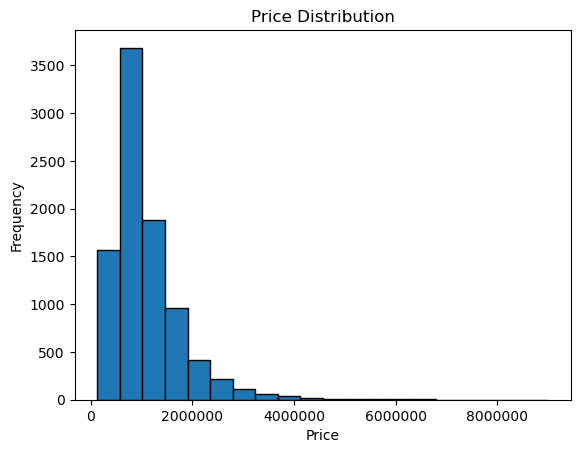

In [30]:
# Build a Histogram to visualize price distribution

price_data = df_copy["Price"]

plt.hist(price_data, bins=20, edgecolor='k')  # 'bins' sayısı ve kenar rengi isteğe bağlıdır
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.ticklabel_format(axis='both', style='plain')  # Bilimsel gösterimden çıkartma
plt.show()

House Prices are distributed mainly in the intervall between 600.000 - 1.200.00

**Draw a pair plot to see the relationship between all numerical variables and
the price variable.**


**Weak Positive Correlation**


*   Postcode and Price


**Strong Positive Correlation**


*   Rooms and Price
*   Bathroom and Price
*   Building Area and Price


In [31]:
# Identify numeric features
numeric_columns = df_copy.select_dtypes(include = ['float64','int64']).columns

In [32]:
numeric_columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

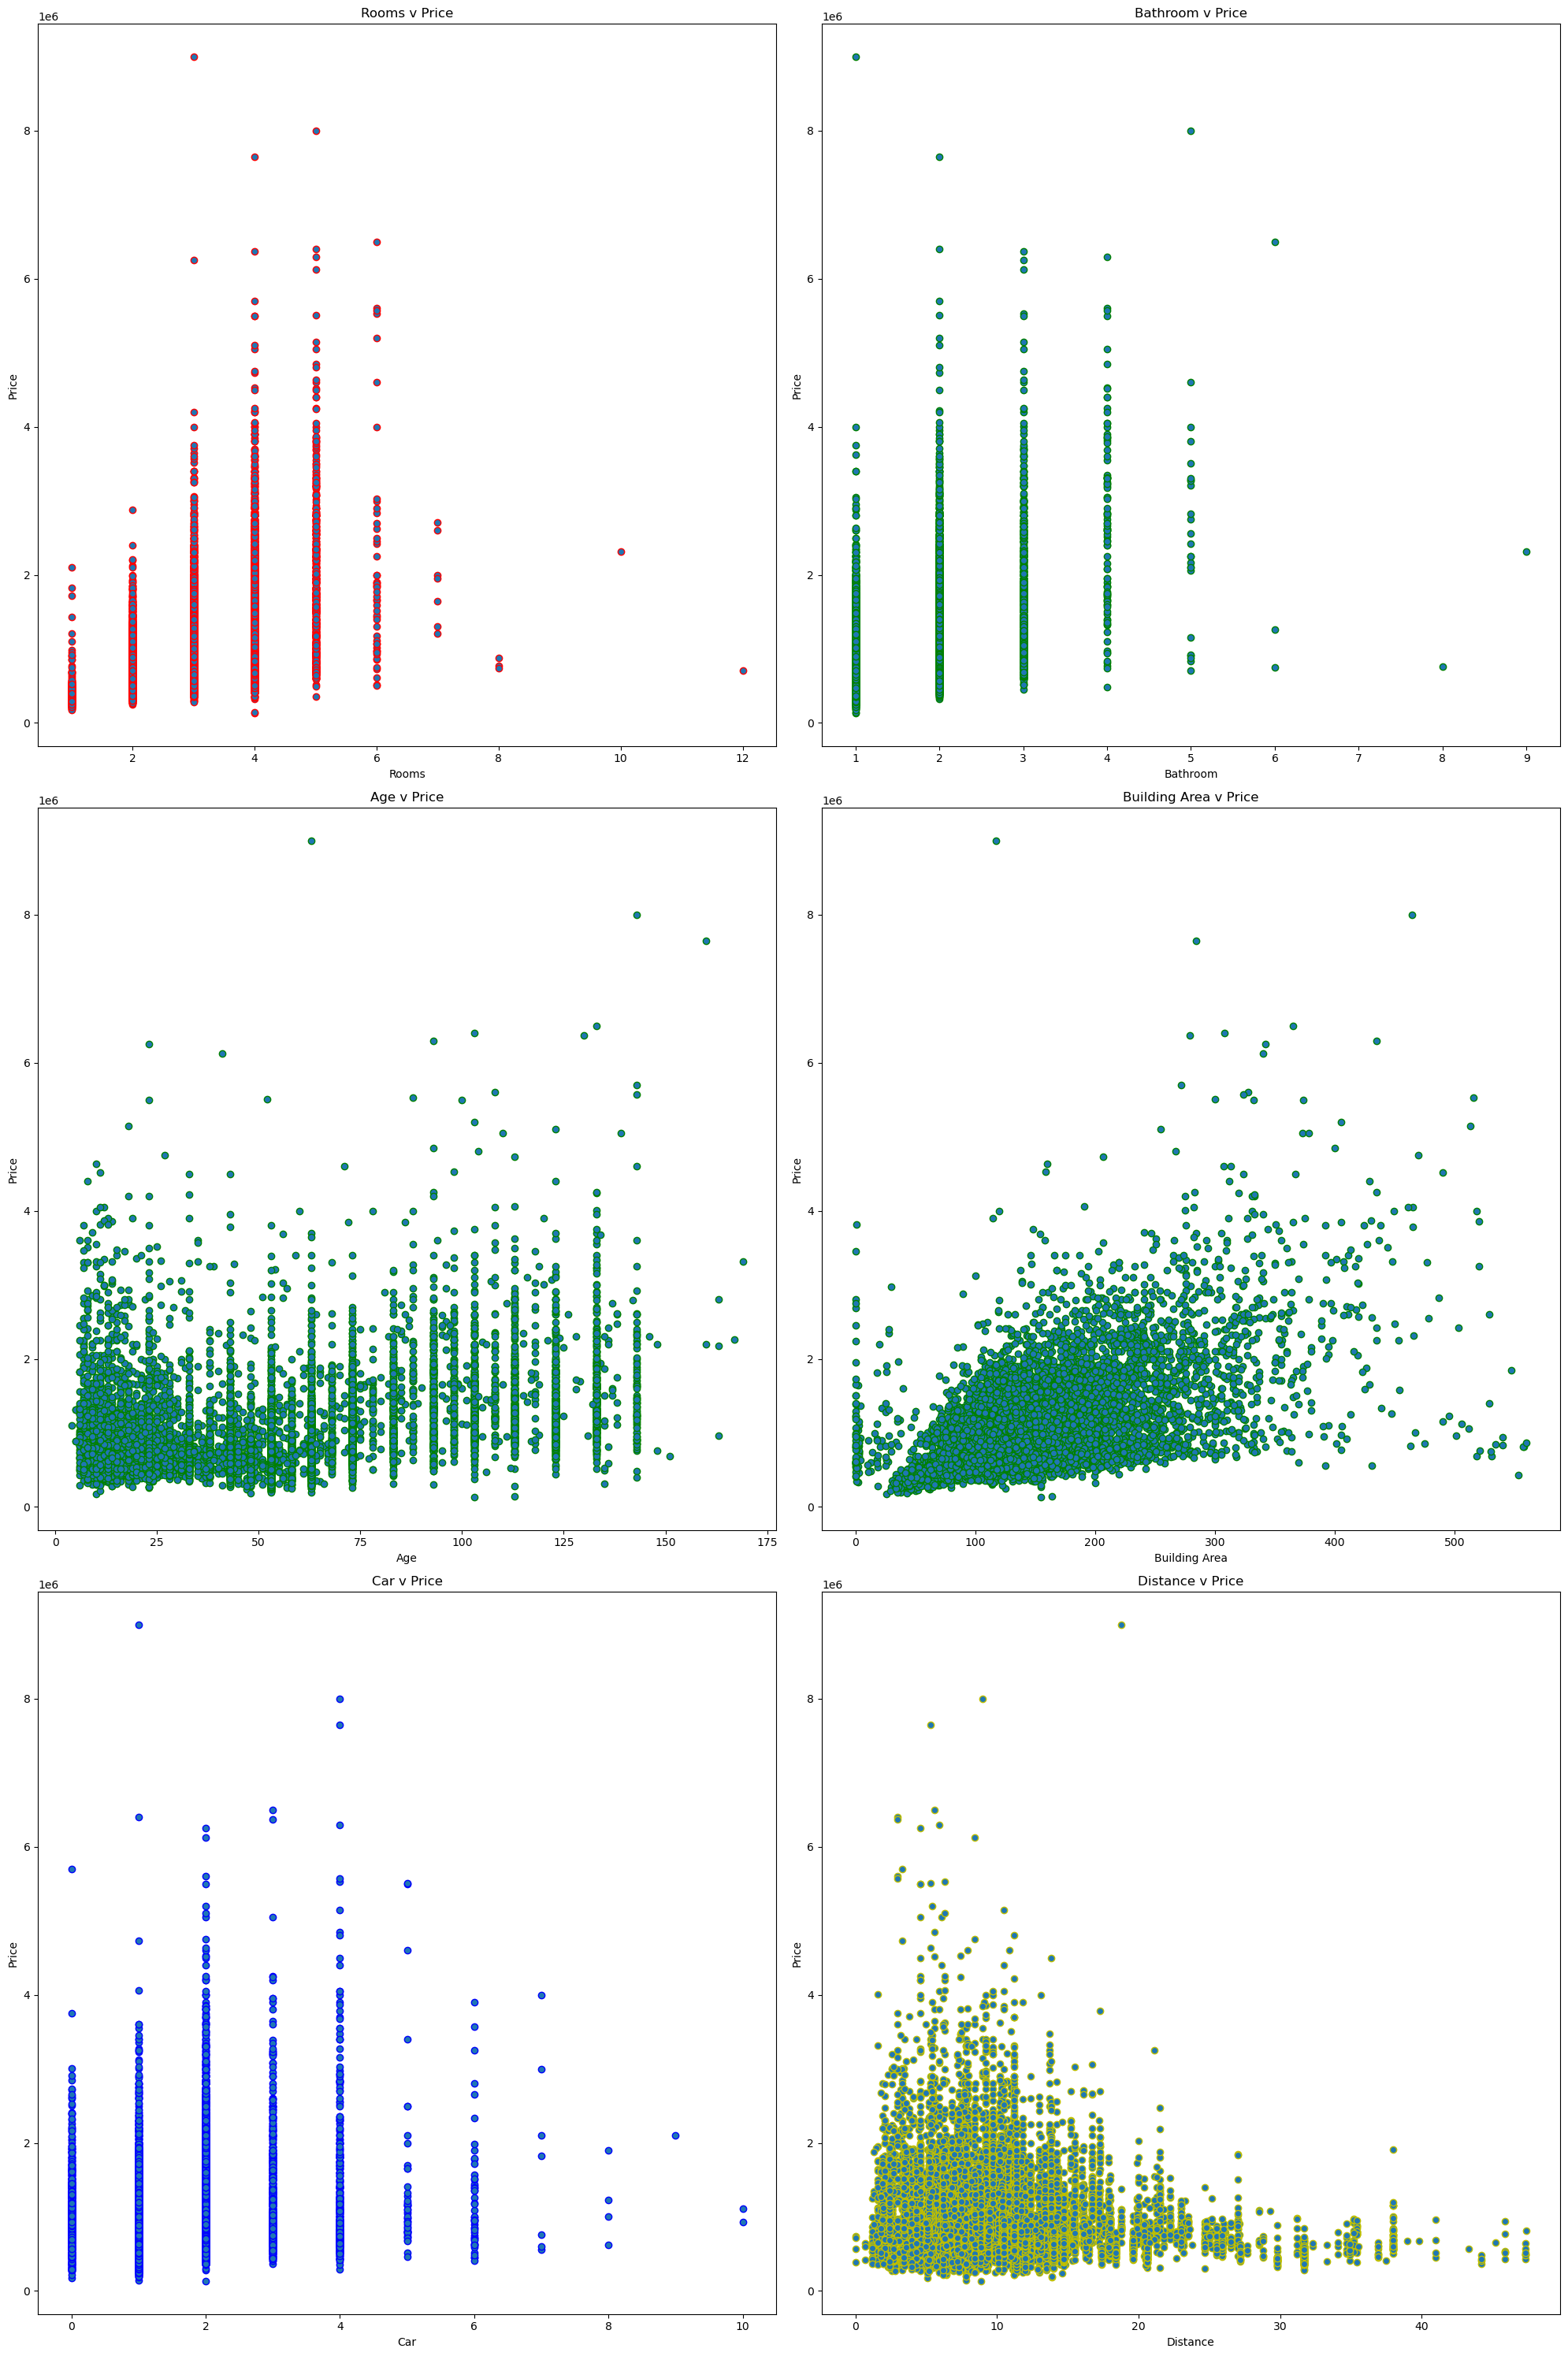

In [33]:
# Suplots of numeric features v price
fig, axes = plt.subplots(3,2, figsize=(20,30))

# Plot [0,0] Rooms v Price
axes[0,0].scatter(x = "Rooms", y = "Price", data=df_copy, edgecolor="r")
axes[0,0].set_xlabel("Rooms")
axes[0,0].set_ylabel("Price")
axes[0,0].set_title("Rooms v Price")

# Plot [0,1] Bathroom v Price
axes[0,1].scatter(x = 'Bathroom', y = 'Price', data = df_copy, edgecolor = 'g')
axes[0,1].set_xlabel('Bathroom')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Bathroom v Price')

# Plot [1,0] Age v Price
axes[1,0].scatter(x = "Age", y = "Price", data=df_copy, edgecolor="g")
axes[1,0].set_xlabel("Age")
axes[1,0].set_ylabel("Price")
axes[1,0].set_title("Age v Price")

# Plot [1,1] BuildingArea v Price
axes[1,1].scatter(x = "BuildingArea", y = "Price", data=df_copy, edgecolor="g")
axes[1,1].set_xlabel("Building Area")
axes[1,1].set_ylabel("Price")
axes[1,1].set_title("Building Area v Price")

# Plot [2,0]
axes[2,0].scatter(x = "Car", y = "Price", data=df_copy, edgecolor="b")
axes[2,0].set_xlabel("Car")
axes[2,0].set_ylabel("Price")
axes[2,0].set_title("Car v Price")

# Plot [2,1] Distance vs Price -> Negative Correlation
axes[2,1].scatter(x = "Distance", y = "Price", data = df_copy, edgecolor = "y")
axes[2,1].set_xlabel("Distance")
axes[2,1].set_ylabel("Price")
axes[2,1].set_title("Distance v Price")

plt.tight_layout()
plt.show()




C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The 

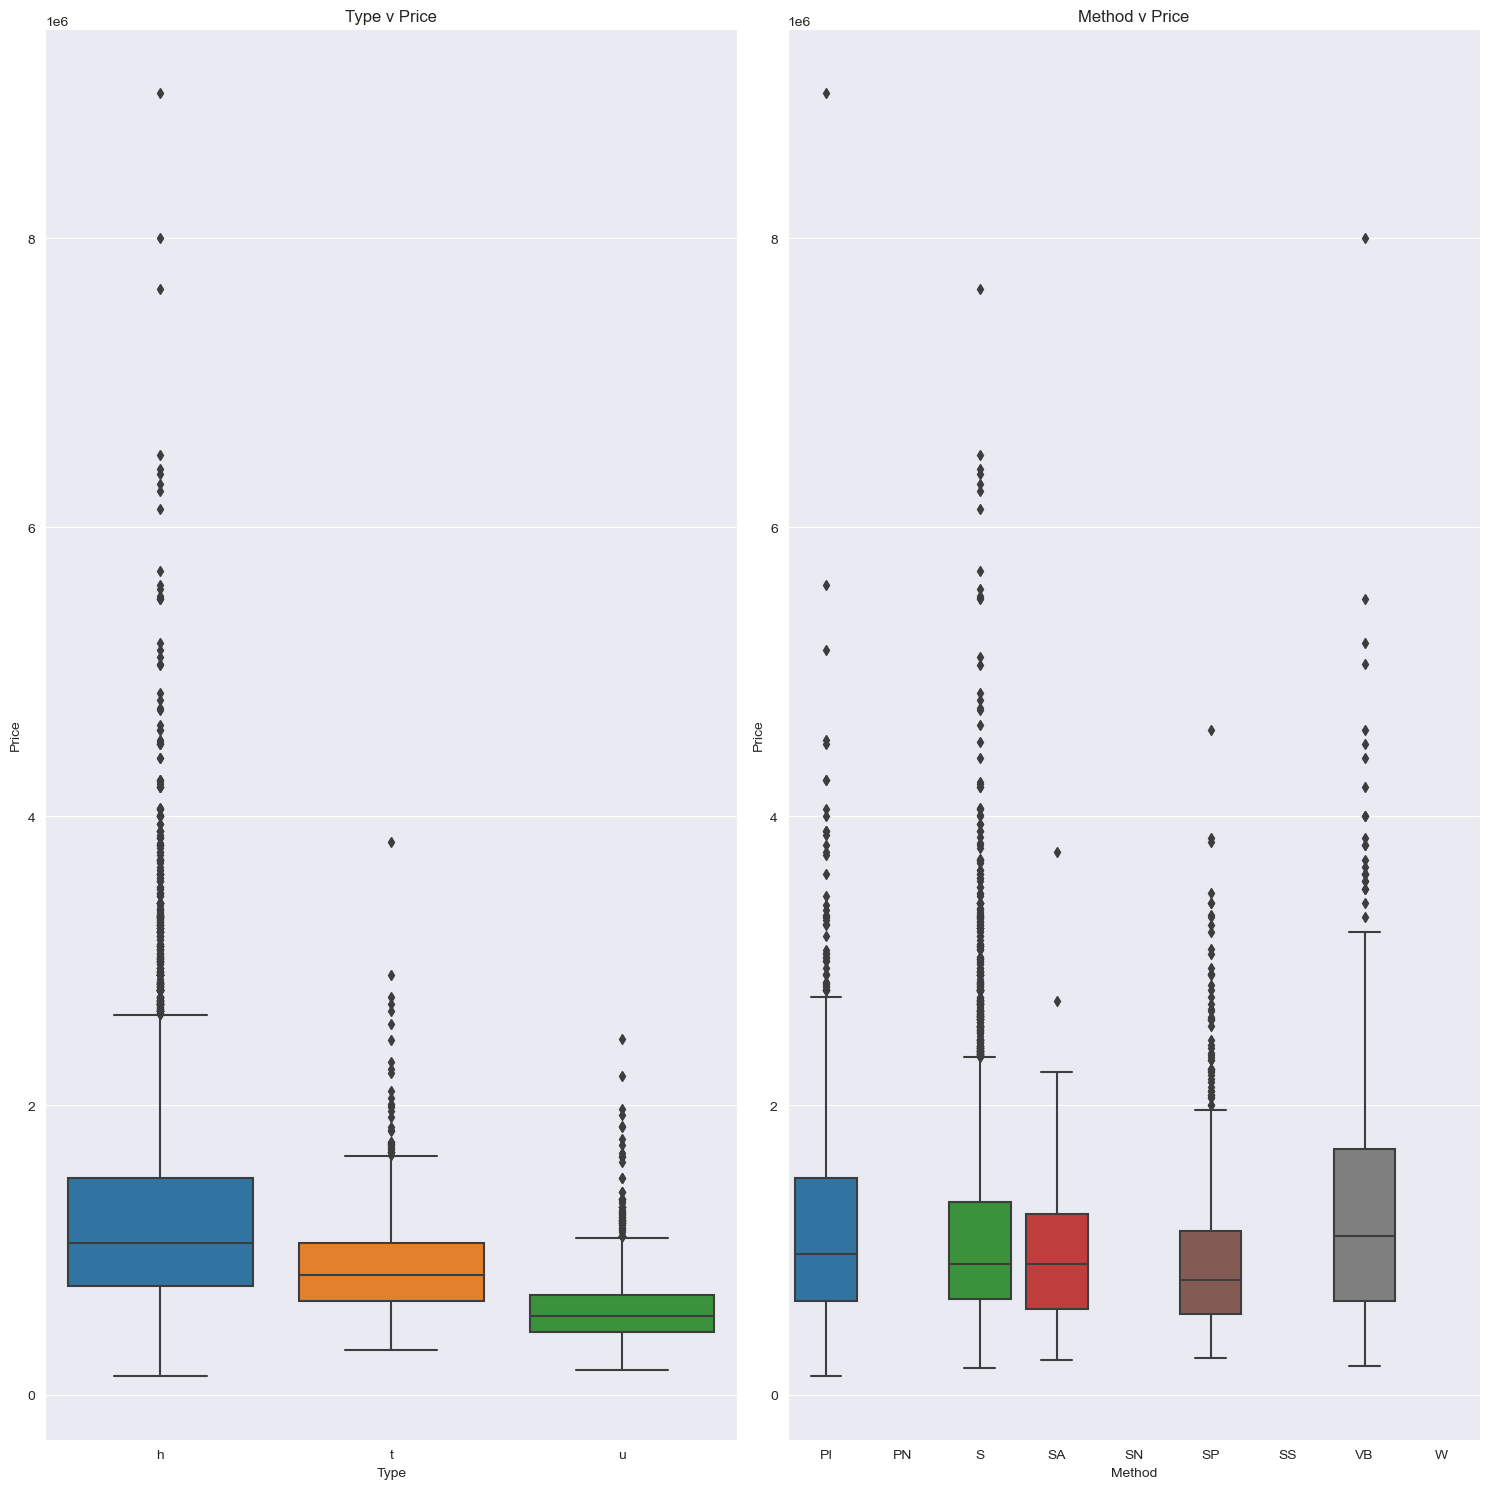

In [34]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
fig, axis = plt.subplots(1,2, figsize=(15,15))

# [0,0] Type v Price
sns.boxplot(x = "Type", y = "Price", data = df_copy, ax=axis[0])
axis[0].set_xlabel("Type")
axis[0].set_ylabel("Price")
axis[0].set_title("Type v Price")

# [0,1] Method v Price
sns.boxplot(x = "Method", y = "Price", data = df_copy, ax = axis[1])
axis[1].set_xlabel("Method")
axis[1].set_ylabel("Price")
axis[1].set_title("Method v Price")

# Show all subplots
plt.tight_layout()
plt.show()

# **2.6 One Hot Encoding**

One-hot encoding turns your categorical data into a binary vector representation.

In [35]:
#df_copy = pd.get_dummies(data=df_copy, columns=category_columns)
df_copy = pd.get_dummies(data=df_copy, columns=["Method"])

In [36]:
# LabelEncoder
labelEncoder = LabelEncoder()

In [37]:
df_copy["Regionname"] = labelEncoder.fit_transform(df_copy["Regionname"])

In [38]:
# New numerical values of Regionname column
df_copy["Regionname"].value_counts()

Regionname
5    2726
2    2665
6    2078
0     983
4     372
3      58
1      52
7      45
Name: count, dtype: int64

In [39]:
# Transform type values like h,t,u into numerical values
df_copy["Type"] = labelEncoder.fit_transform(df_copy["Type"])

In [40]:
df_copy["Type"].value_counts()

Type
0    6722
2    1532
1     725
Name: count, dtype: int64

In [41]:
df_copy["SellerG"] = labelEncoder.fit_transform(df_copy["SellerG"])

In [42]:
df_copy["SellerG"].value_counts()

SellerG
147    1006
100     890
15      748
242     687
183     513
       ... 
201       1
60        1
165       1
220       1
198       1
Name: count, Length: 251, dtype: int64

In [43]:
df_copy.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bathroom,...,Age,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
2,Abbotsford,25 Bloomburg St,2,0,1035000.000,22,4/02/2016,2.500,3067.000,1.000,...,123.000,False,False,True,False,False,False,False,False,False
4,Abbotsford,5 Charles St,3,0,1465000.000,22,4/03/2017,2.500,3067.000,2.000,...,123.000,False,False,False,False,False,True,False,False,False
6,Abbotsford,55a Park St,4,0,1600000.000,147,4/06/2016,2.500,3067.000,1.000,...,9.000,False,False,False,False,False,False,False,True,False
11,Abbotsford,124 Yarra St,3,0,1876000.000,147,7/05/2016,2.500,3067.000,2.000,...,113.000,False,False,True,False,False,False,False,False,False
14,Abbotsford,98 Charles St,2,0,1636000.000,147,8/10/2016,2.500,3067.000,1.000,...,133.000,False,False,True,False,False,False,False,False,False


# **3. Model Selection**

In [44]:
categorical_columns = df_copy.select_dtypes(["category"]).columns.tolist()
unneccessary_columns = ['Postcode', 'Lattitude',
                        'Type', "SellerG", 'YearBuilt']
label = ['Price']

In [45]:
categorical_columns

['Suburb', 'Address', 'Date', 'CouncilArea']

In [46]:
# Split
# Create features variable
X = df_copy.drop(categorical_columns + unneccessary_columns + label, axis=1)


In [47]:
# X.columns
# All necessary numerical features which have strong correlation with price
X.head().columns

Index(['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'Longtitude', 'Regionname', 'Propertycount', 'Age', 'Method_PI',
       'Method_PN', 'Method_S', 'Method_SA', 'Method_SN', 'Method_SP',
       'Method_SS', 'Method_VB', 'Method_W'],
      dtype='object')

In [48]:
# Create target variable
y = df_copy["Price"]

In [49]:
# Previewing label
y.head()

2    1035000.000
4    1465000.000
6    1600000.000
11   1876000.000
14   1636000.000
Name: Price, dtype: float64

In [50]:
# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [51]:
# Shape of training data
print("X_train shape: {}".format(X_train.shape))
# Shape of testing data
print("X_test shape: {}".format(X_test.shape))
# Shape of labels for training
print("y_train shape: {}".format(y_train.shape))
# Shape of labels for testing
print("y_test shape: {}".format(y_test.shape))

X_train shape: (7183, 19)
X_test shape: (1796, 19)
y_train shape: (7183,)
y_test shape: (1796,)


**Train your models using preprocessed data with the models mentioned**

In [52]:
# Creating the model
linear_reg = LinearRegression()

In [53]:
# Fit model to training data
linear_reg.fit(X_train, y_train)

LinearRegression()

In [54]:
# Predict
# Predicting test set results
y_pred = linear_reg.predict(X_test)

## **Regression Evaluation Metrics**
Three common evaluation metrics for regresson problems:

1.   Mean Absolute Error (MAE)
2.   Mean Squared Error (MSE)
3.   Root Mean Squared Error (RMSE)

All basic variations on the difference between what you predicted and the true values.

**Comparing these metrics:**

MAE is the easiest to understand, because it's the average error.
MSE more popular than MAE, because MSE "punishes" larger errors, tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units (target units) .

All of these are loss functions, because we want to minimize them.

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
# Scores
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test, y_pred))

MAE:  273083.09317722864
MSE:  181158617199.94797
RMSE:  425627.3219612998
R2:  0.6217572999451415


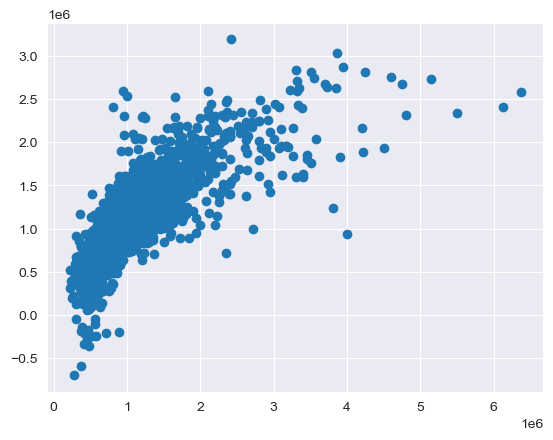

In [57]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

In [58]:
coef_df = pd.DataFrame(data=linear_reg.coef_, index=X.columns, columns = ["Coefficients"])
coef_df

,Coefficients
Rooms,92053.114
Distance,-30879.385
Bathroom,153415.145
Car,45174.692
Landsize,56.546
BuildingArea,3537.093
Longtitude,1530252.963
Regionname,56972.179
Propertycount,2.604
Age,5354.296


In [60]:
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(n_estimators=150)
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
    },
    'CatBoostRegressor': {
        'model': CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)
    }
}


In [62]:
# MAE,MSE, RMSE results of all models
results = dict()

In [78]:
for model_name, model_config in models.items():
    model = model_config['model']
    model.fit(X_train, y_train) # Training
    y_pred = model.predict(X_test) # Predictions
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("*******************")
    print(f"{model_name}: ")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {np.sqrt(mse)}")
    print(f"R2 Score: {r2}" )
    print("********************\n")

    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": np.sqrt(mse),
        "R2": r2
    }

*******************
Lasso: 
MAE: 273082.5077477873
MSE: 181158513272.50784
RMSE: 425627.19987391296
R2 Score: 0.621757516936175
********************

*******************
LinearRegression: 
MAE: 273083.09317722864
MSE: 181158617199.94797
RMSE: 425627.3219612998
R2 Score: 0.6217572999451415
********************

*******************
Ridge: 
MAE: 272999.1954131139
MSE: 181166009368.4177
RMSE: 425636.00572369073
R2 Score: 0.6217418657703588
********************

*******************
ElasticNet: 
MAE: 297640.68202069605
MSE: 209574296396.81912
RMSE: 457792.85315174935
R2 Score: 0.5624279487420771
********************

*******************
KNeighborsRegressor: 
MAE: 259449.11625835186
MSE: 195936101244.19217
RMSE: 442646.7002522352
R2 Score: 0.5909032586011225
********************

*******************
RandomForestRegressor: 
MAE: 167258.36861579525
MSE: 84160346328.55217
RMSE: 290104.0267361902
R2 Score: 0.8242808588137495
********************

*******************
GradientBoostingRegressor: 
MA

## **7. Model Evaluation**

● Comparing models in each other

● Choose the best performing model by using evaluation metrics(MAE, MSE, RMSE,
R2)

In [63]:
results_df = pd.DataFrame(index=list(results.keys()),
                          data=list(results.values()),
                          columns=["MAE","MSE","RMSE", "R2"])

results_df.to_csv("Model_Results.csv")

In [93]:
# Some of these models create coefficient matrix at the end of prediction phase
models_with_coefficients = ['Lasso', 'LinearRegression', 'Ridge', 'ElasticNet']
coef_dict = dict()

for model_name, model_config in models.items():
    model = model_config['model']
    if model_name in models_with_coefficients:
        coefficients = [float(val) for val in model.coef_]
        coef_dict[model_name] = coefficients

In [65]:
coef_df = pd.DataFrame(data=coef_dict, index=X.columns, columns=coef_dict.keys())
# To prevent creating new indexes in csv file
coef_df.to_csv("Model_Coefficients.csv", index=True)

In [66]:
# Coefficients of features
coef_df.head()

,Lasso,LinearRegression,Ridge,ElasticNet
Rooms,94074.202,94076.745,93734.835,51019.450
Distance,-31170.635,-31170.908,-31108.527,-26411.143
Bathroom,165553.570,165553.924,165963.156,76239.154
Car,39958.265,39959.315,39896.236,27562.509
Landsize,71.422,71.421,71.562,84.679


### Hyperparameter Tuning

In [72]:
# RandomForestRegressor Hyperparameter Tuning
rf_reg = models['RandomForestRegressor']['model']
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
#####################
# Cross Validation
#####################

cv_results = cross_validate(rf_reg,
                           X_train, y_train,
                           cv=5, n_jobs=-1,
                           scoring=['neg_mean_squared_error', 'neg_root_mean_squared_error'])

In [81]:
cv_results['test_neg_mean_squared_error'].mean()
# -95485797300.1726
cv_results['test_neg_root_mean_squared_error'].mean()
# -307417.0666088578

-307417.0666088578

In [83]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

params_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap': bootstrap
}

In [84]:
rf_reg_grid = GridSearchCV(rf_reg, 
                           param_grid=params_grid, 
                           n_jobs=-1, 
                           cv=5, 
                           verbose=1,
                          )

rf_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4320 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2523 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constr

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=150), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, 120],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [5, 20, 50, 100]},
             verbose=1)

In [85]:
rf_reg_grid.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [86]:
models['RandomForestRegressor']['model'].set_params(**rf_reg_grid.best_params_)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt')

In [87]:
models['RandomForestRegressor']['model'].get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 40,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [88]:
cv_results = cross_validate(models['RandomForestRegressor']['model'],
                           X_train, y_train,
                           cv=5, n_jobs=-1,
                           scoring=['neg_mean_squared_error', 'neg_root_mean_squared_error'])

In [92]:
cv_results['test_neg_mean_squared_error'].mean()
# -91915963870.72821
cv_results['test_neg_root_mean_squared_error'].mean()
# -301722.3044923259

-301722.3044923259

In [64]:
## Hyperparameters Tuning for GradientBoostingRegressor
gbm_model = models['GradientBoostingRegressor']['model']
gbm_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [66]:
cv_results_gbm = cross_validate(gbm_model, 
                               X_train, y_train,
                               n_jobs=-1,
                               cv=5,
                               scoring=['r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error'])

In [72]:
cv_results_gbm['test_r2'].mean()
# 0.7760569413971778
cv_results_gbm['test_neg_mean_squared_error'].mean()
# -102007584704.53384
cv_results_gbm['test_neg_root_mean_squared_error'].mean()
# -317764.5560186262

-317764.5560186262

In [73]:
n_estimators_gbm = [5,20,50,100, 200] # number of trees in the random forest
max_features_gbm = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth_gbm = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split_gbm = [2, 6, 10, 15] # minimum sample number to split a node
min_samples_leaf_gbm = [1, 3, 4, 8] # minimum sample number that can be stored in a leaf node

params_grid_gbm = {
    'n_estimators': n_estimators_gbm,
    'max_features': max_features_gbm,
    'max_depth': max_depth_gbm,
    'min_samples_split': min_samples_split_gbm,
    'min_samples_leaf': min_samples_leaf_gbm
}

In [74]:
gbm_model_grid = GridSearchCV(gbm_model, 
                             param_grid=params_grid_gbm,
                             cv=5,
                             n_jobs=-1,
                             verbose=True
                             )
gbm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4800 fits failed out of a total of 9600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3529 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constr

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, 120],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4, 8],
                         'min_samples_split': [2, 6, 10, 15],
                         'n_estimators': [5, 20, 50, 100, 200]},
             verbose=True)

In [75]:
gbm_model_grid.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 100}

In [76]:
gbm_model_grid.best_score_

0.8219707167508498

In [77]:
models['GradientBoostingRegressor']['model'].set_params(**gbm_model_grid.best_params_)

GradientBoostingRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                          min_samples_split=6)

In [79]:
gbm_predictions = models['GradientBoostingRegressor']['model'].predict(X_test)

In [80]:
y_pred_gbm = pd.DataFrame({"actual": y_test, "predicted": gbm_predictions} )
y_pred_gbm.head()

,actual,predicted
16647,1005000.000,834313.374
21315,1975000.000,1695173.427
33950,805000.000,872255.383
490,1380000.000,1265354.276
5716,835000.000,858707.683


# **CONCLUSION**


### **LinearRegression Coefficients**

Every one unit increase in:
- **Rooms** is associated with an increase in Price by 	\$94785.296
- **Distance** is associated with a *decrease* in Price by \$31632.189  
- **Bathroom** is associated with an increase in Price by \$154108.181  
- **Car** space is associated with an increase in Price by \$42262.346  
- **Landsize**  is associated with an increase in Price by \$62.540  
- **BuildingArea**  is associated with an increase in Price by \$3599.622  
- **Propertycount** is associated with an increase in Price by \$1.288 
- **Age** is associated with an increase in Price by \$5331.048
- **Longtitude** is associated with an increase in Price by \$1532723.923.048
- **Regionname** is associated with an increase in Price by \$58750.203
- **Method_PI** is associated with a* decrease* in Price by \$30802.127
- **Method_S** is associated with an increase in Price by \$28412.483
- **Method_SA** is associated with an increase in Price by \$20163.426
- **Method_SP** is associated with a* decrease* in Price by \$28477.924
- **Method_VB** is associated with an increase in Price by \$10704.142

### **Lasso Coefficients**

Every one unit increase in:
- **Rooms** is associated with an increase in Price by 	\$94782.167
- **Distance** is associated with a *decrease* in Price by \$31631.786  
- **Bathroom** is associated with an increase in Price by \$154108.002  
- **Car** space is associated with an increase in Price by \$42261.260  
- **Landsize**  is associated with an increase in Price by \$62.540  
- **BuildingArea**  is associated with an increase in Price by \$3599.669  
- **Propertycount** is associated with an increase in Price by \$1.288 
- **Age** is associated with an increase in Price by \$5331.084
- **Longtitude** is associated with an increase in Price by \$1532621.224
- **Regionname** is associated with an increase in Price by \$58746.923
- **Method_PI** is associated with a* decrease* in Price by \$34478.798
- **Method_S** is associated with an increase in Price by \$24722.134
- **Method_SA** is associated with an increase in Price by \$16345.786
- **Method_SP** is associated with a* decrease* in Price by \$32162.293
- **Method_VB** is associated with an increase in Price by \$7006.268


### **Ridge Coefficients**

Every one unit increase in:
- **Rooms** is associated with an increase in Price by 	\$94435.018
- **Distance** is associated with a *decrease* in Price by \$31564.528  
- **Bathroom** is associated with an increase in Price by \$154543.336 
- **Car** space is associated with an increase in Price by \$42219.163  
- **Landsize**  is associated with an increase in Price by \$62.645
- **BuildingArea**  is associated with an increase in Price by \$3603.146  
- **Propertycount** is associated with an increase in Price by \$1.288 
- **Age** is associated with an increase in Price by \$5339.791
- **Longtitude** is associated with an increase in Price by \$1510879.087
- **Regionname** is associated with an increase in Price by \$58106.551
- **Method_PI** is associated with a* decrease* in Price by \$30549.985
- **Method_S** is associated with an increase in Price by \$28313.382
- **Method_SA** is associated with an increase in Price by \$20145.684
- **Method_SP** is associated with a* decrease* in Price by \$28924.871
- **Method_VB** is associated with an increase in Price by \$11015.790


### **ElasticNet Coefficients**

Every one unit increase in:
- **Rooms** is associated with an increase in Price by 	\$48693.556
- **Distance** is associated with a *decrease* in Price by \$26377.216
- **Bathroom** is associated with an increase in Price by \$73652.542 
- **Car** space is associated with an increase in Price by \$29659.791  
- **Landsize**  is associated with an increase in Price by \$73.637
- **BuildingArea**  is associated with an increase in Price by \$4772.418  
- **Propertycount** is associated with a* decrease* in Price by \$1.104 
- **Age** is associated with an increase in Price by \$5693.617
- **Longtitude** is associated with an increase in Price by \$1510879.087
- **Regionname** is associated with an increase in Price by \$58106.551
- **Method_PI** is associated with a* decrease* in Price by \$2644.577
- **Method_S** is associated with an increase in Price by \$10325.677
- **Method_SA** is associated with an increase in Price by \$569.121
- **Method_SP** is associated with a* decrease* in Price by \$15034.968
- **Method_VB** is associated with an increase in Price by \$6783.748